# Planetary Mystery
 
The dataset is called `planet_weather.csv`, and it contains the following information: 

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.


# Task 1: Data Inspection

![](https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif)

In [2]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

In [3]:
# load planet_weather.csv data from datasets folder
df = pd.read_csv('datasets/planet_weather.csv')

In [4]:
# preview the data
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [5]:
# How many rows and columns are there in the dataset?
df.shape

(1894, 10)

In [6]:
# what are the names of all the columns?
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [7]:
# What is the data type of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


In [8]:
# How many null values are there in each column?
df.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [9]:
# Provide a statistical summary of the DataFrame
df.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


# Task 2: Data Cleaning

![](https://media.giphy.com/media/l49JEBkw8tD64fbeE/giphy-downsized-large.gif)

In [10]:
# Delete wind_speed column, which is filled with null values
df = df.drop(columns=['wind_speed'])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Sunny


In [11]:
# How many unique values are there in the atmo_opacity column?
df['atmo_opacity'].value_counts()

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64

In [12]:
# Delete atmo_opacity column, which mostly contains identical values
df = df.drop(columns=['atmo_opacity'])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0


# Task 3: Data Analysis & Visualization

![](https://media.giphy.com/media/1n8aGJBEXuW0M7ELrB/giphy.gif)



In [13]:
# How many months are there on this planet?
df['month'].nunique()

12

In [19]:
# What is the average min_temp for each month?
avg_min_temp = df.groupby('month').agg({'min_temp':'mean'})

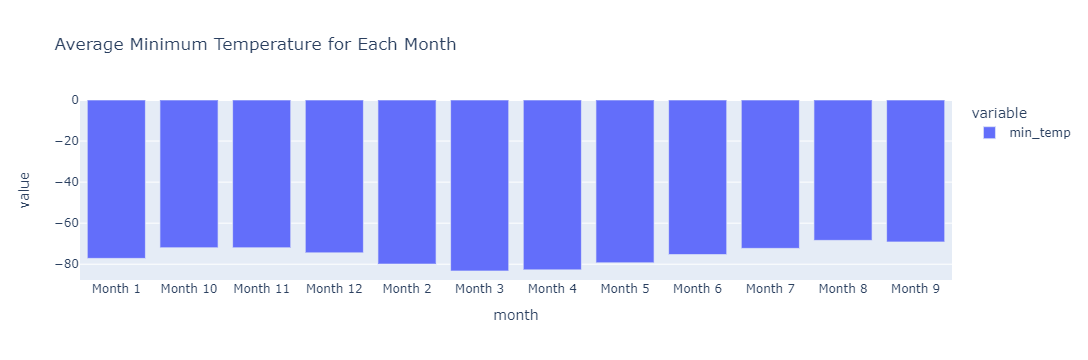

In [20]:
# Plot a bar chart of the average min_temp by month
px.bar(avg_min_temp, title="Average Minimum Temperature for Each Month")

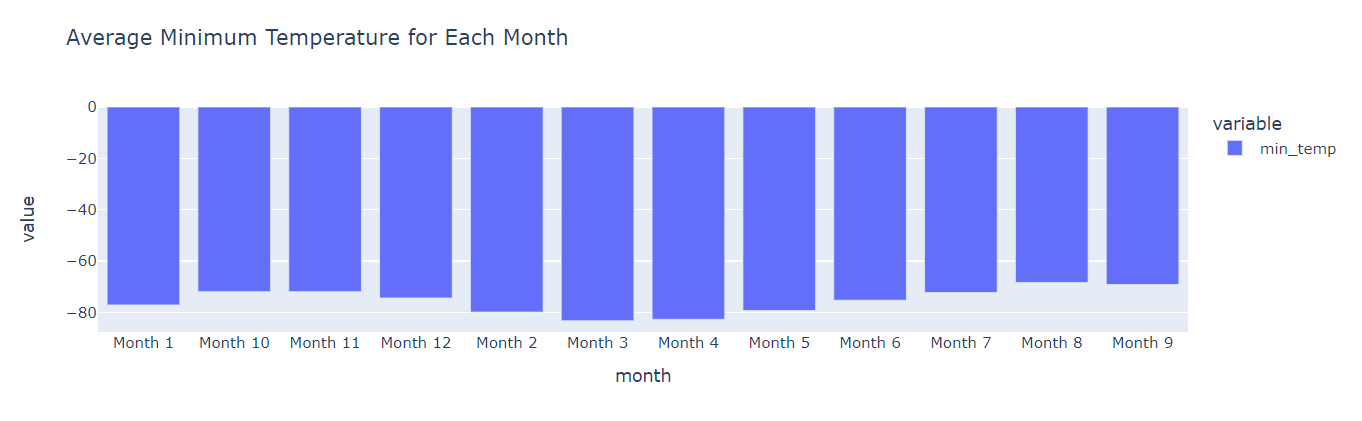

### Based on the minimum temperature, what is the coldest month? The warmest month?

The coldest month is Month 3 and the warmest is Month 8.

In [22]:
# What is the average pressure for each month?
avg_pressure = df.groupby('month').agg({'pressure':'mean'})

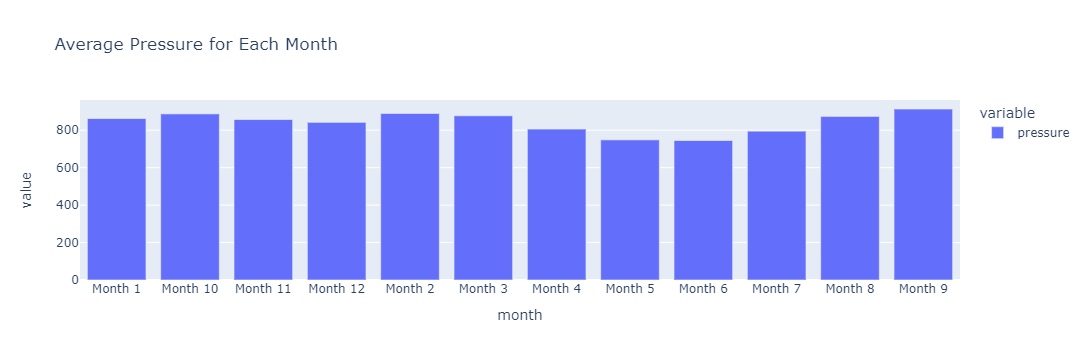

In [23]:
# Create a bar chart of the average atmospheric pressure by month
px.bar(avg_pressure, title="Average Pressure for Each Month")

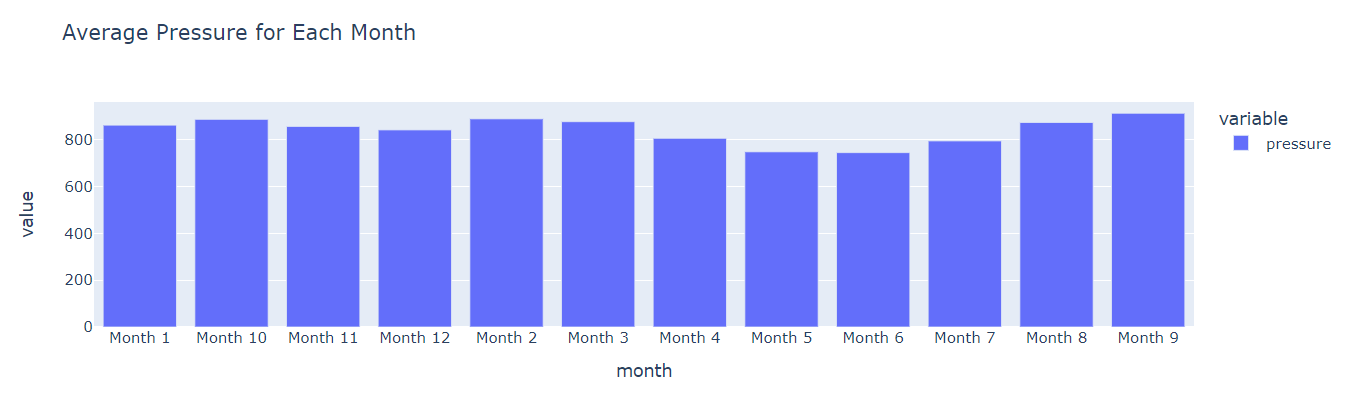

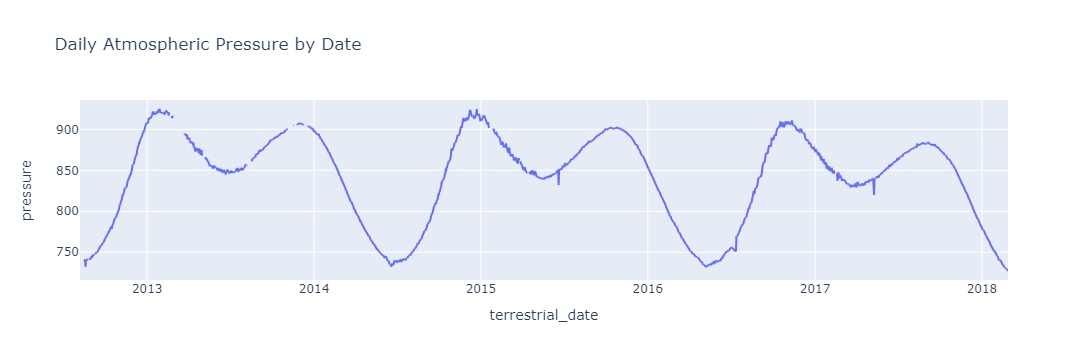

In [24]:
# Plot a line chart of the daily atmospheric pressure by terrestrial date
px.line(df, x='terrestrial_date', y='pressure', title="Daily Atmospheric Pressure by Date")

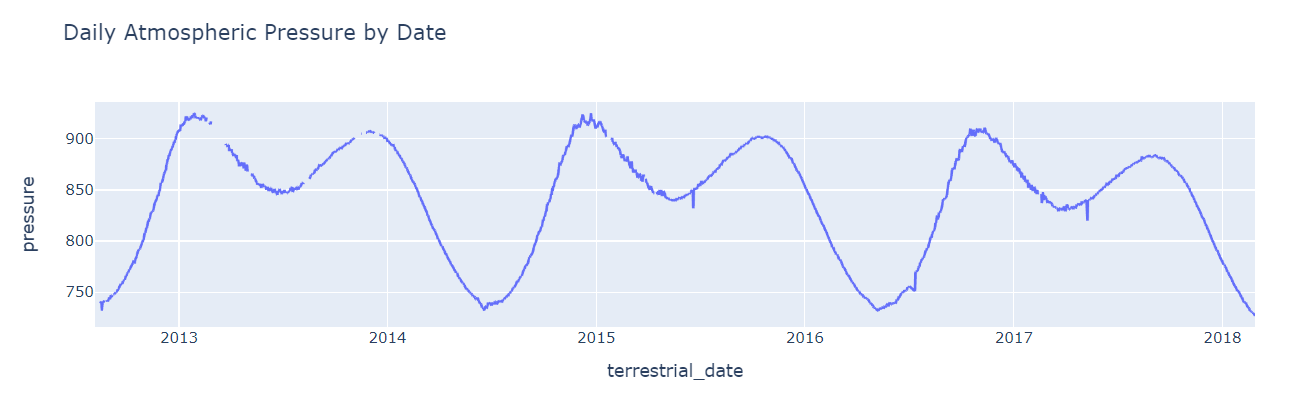

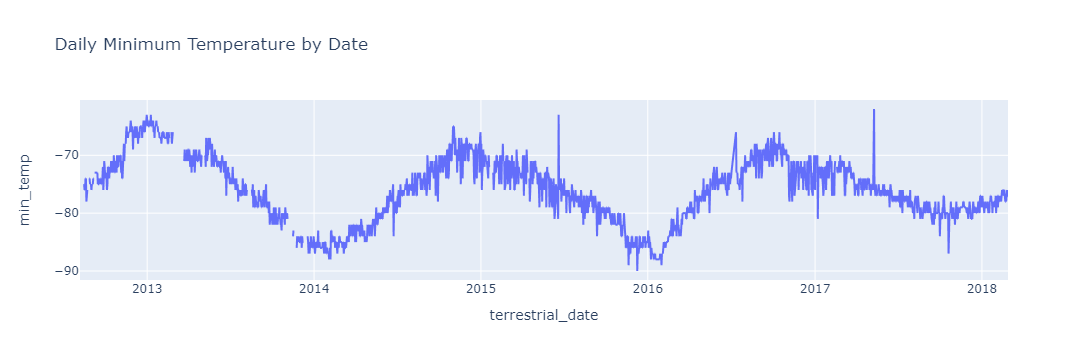

In [26]:
# Plot a line chart the daily minimum temp
px.line(df, x='terrestrial_date', y='min_temp', title="Daily Minimum Temperature by Date")

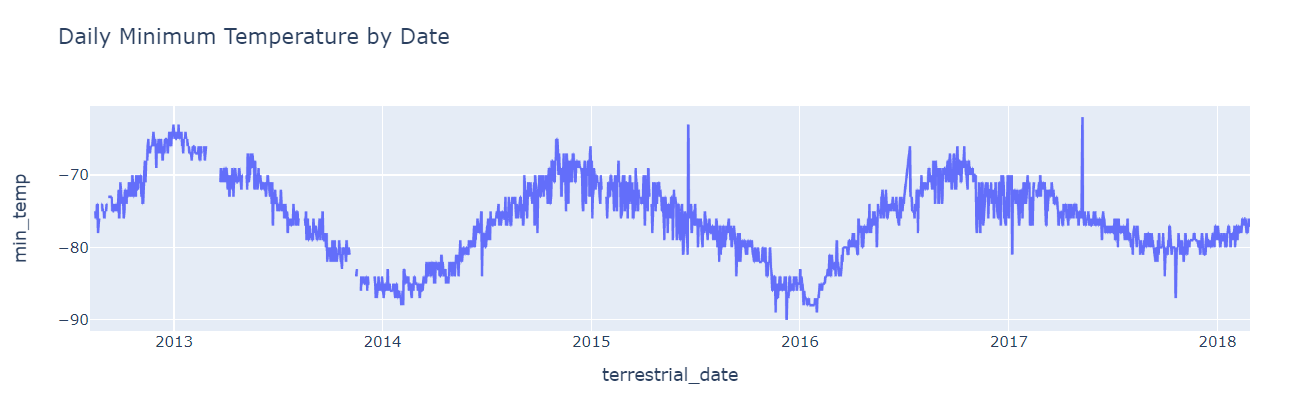

### Based on this information, approximately how many earth days are there in a year on this planet? 

Looking at the visualizations, we can either look from peak to peak or from trough to trough to determine how long a cycle approximately lasts. Based on this, it looks like each weather cycle on the mystery planet lasts just shy of 2 years, about 23 months. We can approximate the number of days in a year on this mystery planet by multiplying the number of months by 30, the number of days in a typical month. (23 months x 30 days) = 690 days in a year on the mystery planet.

### What is the identity of the planet?

Using [this website](https://spaceplace.nasa.gov/years-on-other-planets/en/) that holds information on how long a year is on each planet, it would seem very likely that our mystery planet is Mars. We calculated an estimated 690 days in a year for our mystery planet and Mars has 687 days in a year.

## Congratulations on making your first extra-terrestrial discovery! 

![](https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif)

# Level Up

![](https://media.giphy.com/media/kjjRGpezebjaw/giphy.gif)

Earlier in the assignment you investigated how many months were in our mystery planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014. 

In [27]:
# filter to all values where terrestrial_date is before 2014
before_2014 = df[df['terrestrial_date'] < '2014']
before_2014

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
1453,432,2013-12-31,499,69,Month 3,-84.0,-30.0,899.0,NaN,Sunny
1454,424,2013-12-30,498,69,Month 3,-86.0,-28.0,901.0,NaN,Sunny
1455,425,2013-12-29,497,69,Month 3,-86.0,-30.0,901.0,NaN,Sunny
1456,428,2013-12-28,496,68,Month 3,-85.0,-26.0,901.0,NaN,Sunny
1457,431,2013-12-27,495,68,Month 3,-86.0,-26.0,900.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

In [28]:
# For each month, calculate the minimum AND maximum terrestrial_date
before_2014.groupby('month').agg({'terrestrial_date': ['min', 'max']})

terrestrial_date            
                      min         max
month                                
Month 1        2013-08-01  2013-10-02
Month 10       2013-02-24  2013-04-12
Month 11       2013-04-13  2013-06-04
Month 12       2013-06-05  2013-07-31
Month 2        2013-10-03  2013-12-08
Month 3        2013-12-09  2013-12-31
Month 6        2012-08-07  2012-09-29
Month 7        2012-09-30  2012-11-19
Month 8        2012-11-20  2013-01-07
Month 9        2013-01-08  2013-02-23

### How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?

Each month on Mars is just short of 60 days. This does line up with what I was expecting, since each month is about twice as long and a year on Mars is about twice as long as an Earth year. This provides further evidence that the mystery planet is indeed Mars.